<img src="https://upload.wikimedia.org/wikipedia/commons/b/b1/NYC_DOE_Logo.png" alt="NYC Department of Education" width="400"/>

# Introduction
Welcome to your first day as a newly minted analyst working for New York City’s Department of Education!

You have been handed a CSV file containing data about public high schools in NYC from the past five years. It will be your job to explore the data, make sense of it, and come up with interesting insights and questions. For today, however, your task is to get to know the dataset, and to create some visualizations as you explore the data.

First, let's import our necessary libraries. Pandas and Plotly.



In [1]:
# Import libraries here
import pandas as pd
import plotly as plot

# Task 1: Explore the dataset

![](https://media.giphy.com/media/l4KibOaou932EC7Dy/giphy.gif)

The dataset from the NYC department of education is named `schools.csv`, and is stored in your Datasets folder. Load the dataset into a DataFrame and complete the tasks below to start exploring!

## Data Dictionary

The `schools` dataset contains the following information:

- **school_name**: Name of the school
- **total_enrollment**: Number of students enrolled
- **percent_students_with_disabilities**: Percentage of students with disabilities
- **percent_english_learners**: Percentage of students who speak English as a second language (ESL)
- **percent_poverty**: Percentage of students who are below the poverty line

In [5]:
# Read the CSV file into a pandas DataFrame
dataframe = pd.read_csv("datasets/schools.csv")

In [6]:
# Preview the first five rows
print(dataframe.head())

                                         school_name  total_enrollment  \
0  47 The American Sign Language and English Seco...             176.6   
1              A. Philip Randolph Campus High School            1394.8   
2  A.C.E. Academy for Scholars at the Geraldine F...             469.8   
3                        ACORN Community High School             391.0   
4                        Abraham Lincoln High School            2161.8   

   percent_students_with_disabilities  percent_english_learners  \
0                               27.56                      6.12   
1                               13.20                      9.94   
2                               10.30                      8.18   
3                               27.08                      4.16   
4                               15.48                     15.88   

   percent_poverty  
0            86.08  
1            83.70  
2            65.50  
3            83.88  
4            72.00  


In [7]:
# preview the last five rows
print(dataframe.tail())

                                       school_name  total_enrollment  \
1829               Young Women's Leadership School             479.6   
1830   Young Women's Leadership School of Brooklyn             381.2   
1831  Young Women's Leadership School of the Bronx             326.0   
1832      Young Women's Leadership School, Astoria             566.4   
1833       Young Women's Leadership School, Queens             558.6   

      percent_students_with_disabilities  percent_english_learners  \
1829                               18.60                      2.30   
1830                               16.76                      4.30   
1831                               17.64                      5.40   
1832                               10.60                      3.62   
1833                               13.60                      1.80   

      percent_poverty  
1829            81.12  
1830            78.26  
1831            89.16  
1832            83.60  
1833            71.98  


In [9]:
# List the columns of the DataFrame
column = dataframe.columns.tolist()
print(column)

['school_name', 'total_enrollment', 'percent_students_with_disabilities', 'percent_english_learners', 'percent_poverty']


In [10]:
# Examine the index of the DataFrame
print(dataframe.index)

RangeIndex(start=0, stop=1834, step=1)


According to the `index` how many **rows** are in the dataframe?

1834 rows

In [11]:
# Examine the numbers of rows and columns
# hint: what is the "shape" of the dataframe
print(dataframe.shape)

(1834, 5)


Does the number of rows and columns line up with what you have observed in your previous queries above? Why or Why not?

Yes, the answer is in line with the previous answers as there are 5 columns in the list previouly printed and the number of rows is also in line as numbering for rows starts at 0 and goes all the way to 1833.

In [12]:
# View 15 randomly chosen rows
print(dataframe.sample(n=15))

                                            school_name  total_enrollment  \
407         High School for Health Careers and Sciences             535.6   
1079                         P.S. 126 Jacob August Riis             797.2   
1294                          P.S. 244 Richard R. Green             602.0   
811                             P.S. 011 Kathryn Phelan            1189.8   
1144                                   P.S. 156 Waverly             764.2   
531       Isaac Newton Middle School for Math & Science             244.6   
420   High School for Youth and Community Developmen...             407.4   
1820                      Women's Academy of Excellence             332.8   
799                            P.S. 006 Lillie D. Blake             710.8   
580              Jacqueline Kennedy Onassis High School             648.6   
937                           P.S. 056 Lewis H. Latimer             216.4   
1008                      P.S. 094 The Henry Longfellow            1471.2   

In [13]:
# Call .info() for column data types and other info
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   school_name                         1834 non-null   object 
 1   total_enrollment                    1834 non-null   float64
 2   percent_students_with_disabilities  1834 non-null   float64
 3   percent_english_learners            1834 non-null   float64
 4   percent_poverty                     1834 non-null   float64
dtypes: float64(4), object(1)
memory usage: 71.8+ KB


In [14]:
# Call .describe() to view a statistical summary of the DataFrame
dataframe.describe()

,total_enrollment,percent_students_with_disabilities,percent_english_learners,percent_poverty
count,1834.000000,1834.000000,1834.000000,1834.000000
mean,588.309481,21.944242,13.284084,75.030873
std,481.135549,15.793045,13.986404,19.179663
min,12.000000,0.000000,0.000000,3.950000
25%,313.250000,14.963750,4.120000,68.065000
50%,476.700000,19.340000,9.070000,79.680000
75%,694.950000,24.415000,17.785000,88.580000
max,5591.800000,100.000000,99.600000,99.380000


When looking at statistical summaries of the data, pay attention to the mean and the median of each column. If these two values are super different, then there might be something you should look into.

Do the mean and the median vary significantly in any of the columns?

total_enrollment and percent_english_learners show significant right skew, with the max being about 10 or 8 times the mean, while percent poverty shows significant left skew.


#Task 2: Visually Explore the Data

![](https://media.giphy.com/media/wc5K9GF6Rort3DzFvi/giphy.gif)

Now comes the even more fun part! We get to visualize the data to identify broad trends, and to spot relationships, if any, between the variables in the dataset.

Remember: `px.histogram` is the workhorse of the Plotly library. It will be the most used function in your Python toolbox, especially as you're familiarizing yourself with a dataset.

### Task 2A. Create a histogram to view the distribution of total student enrollment in NYC public high schools.

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint:** You'll need to use the `total_enrollment` column of your DataFrame!</span>


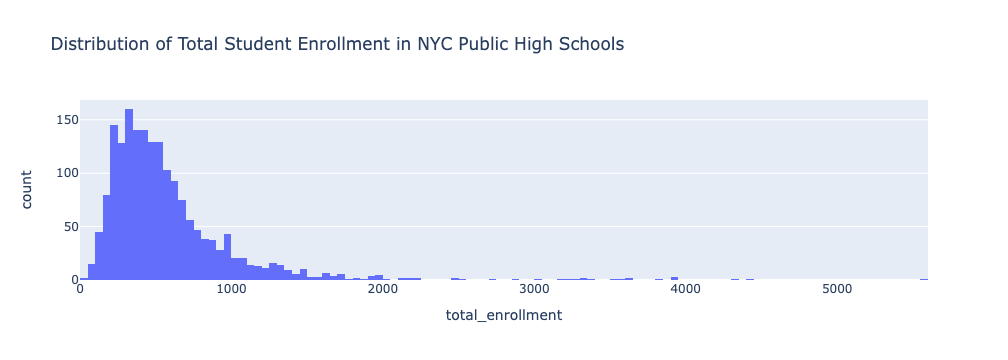

In [20]:
# Plot the data showing the total student enrollment
import plotly.express as px

fig = px.histogram(dataframe, x="total_enrollment", title="Distribution of Total Student Enrollment in NYC Public High Schools")
fig.show()

#### Answer the following questions:
---

**1.** What kind of shape do you see in the data? For example, is it symmetric (bell-shaped), or do the values lump together on either the left or the right with a long tail of values on the other side?


The distribution is right skewed, most school showcase a lower number in enrollment with fewer schools have high enrollment numbers.



**2.** Are there any outliers in your data? Remember that outliers are values that are "far away" from a typical value?

Yes, their are outliners on the far right of the histogram showcasing schools with 2000 and even 5000 students enrolled. they are rare but hold significatly high numbers in enrollment.



**3.** Could these outliers (if any) skew the "average" value?

Yes, the mean is manupilated by these outliners. The mean 588 is much higher than the median of 477.


#### Task 2B. Create a histogram to view the distribution of the percentage of students with disabilities in schools.

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint:** You'll need to use the `percent_students_with_disabilities` column of your DataFrame.</span>

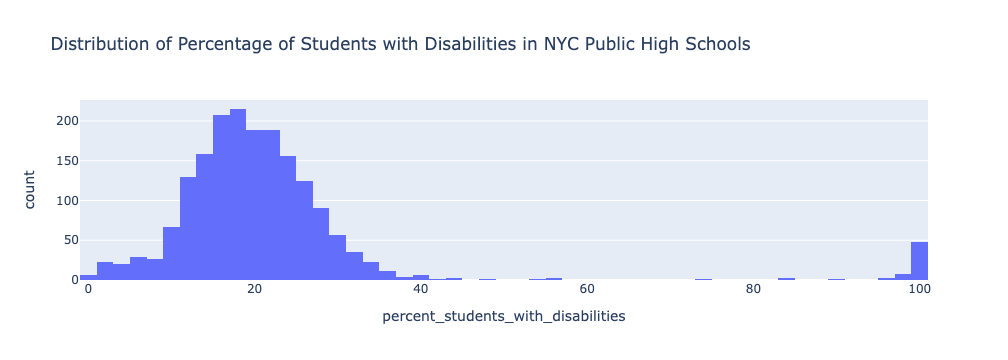

In [21]:
# Plot the data showing the % of students with disabilities in schools
import plotly.express as px

fig = px.histogram(dataframe, x="percent_students_with_disabilities", title="Distribution of Percentage of Students with Disabilities in NYC Public High Schools")
fig.show()


#### Answer the following questions:
---

**1.** What kind of shape do you see in the data?

The data is right skewed with most school having 10% - 30% students with disabilities. However, their is a noticible hike at the 100% mark with 48 schools.



**2.** Are there any outliers in your data?

Yes , the clear outliner is at the 100% mark with rarely any schools in the 60-90% mark.



**3.** Could outliers indicate the existence of specialized schools for students with disabilities?

Yes, the 100% mark showcases their are specialized schools for students with disabilities.



#### Task 2C. Create a histogram to view the distribution of the percentage of students who are learning English as a second language in NYC’s public high schools.
<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint:** Now you'll need to use the `percent_english_learners` column of your DataFrame. </span>

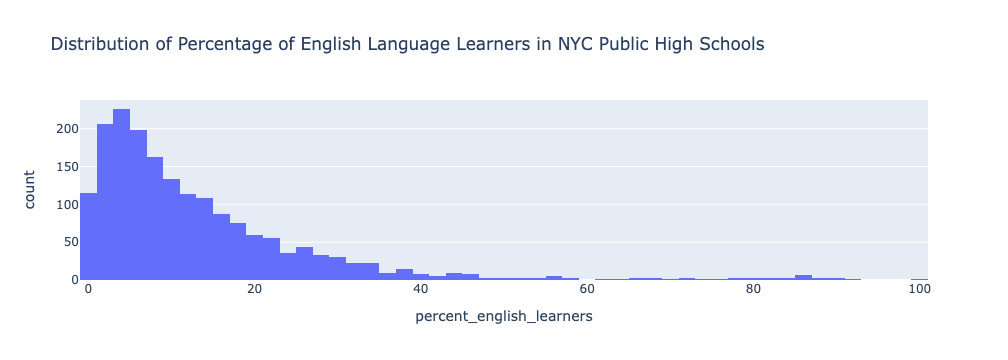

In [22]:
# Plot the data showing the % of students who are learning English as a second language in schools
import plotly.express as px

fig = px.histogram(dataframe, x="percent_english_learners", title="Distribution of Percentage of English Language Learners in NYC Public High Schools")
fig.show()


#### Answer the following questions:
---

**1.** What kind of shape do you see in the data?

The data is right skewed with most schools having a learners percentage of 0-20%. 



**2.** Are there outliers?

Yes, there are a few schools with percentage of leaners above 40%, however such schools are rare.



**3.** What could those outliers indicate about those schools?

It is possible that these schools are specialised or in places with high immigrant population.  



#### Task 2D. Create a histogram to view the distribution of the percentage of students whose families fall below the poverty line in NYC public high schools.
<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint:** For this one, you'll need to use the `percent_poverty` column of your DataFrame. </span>

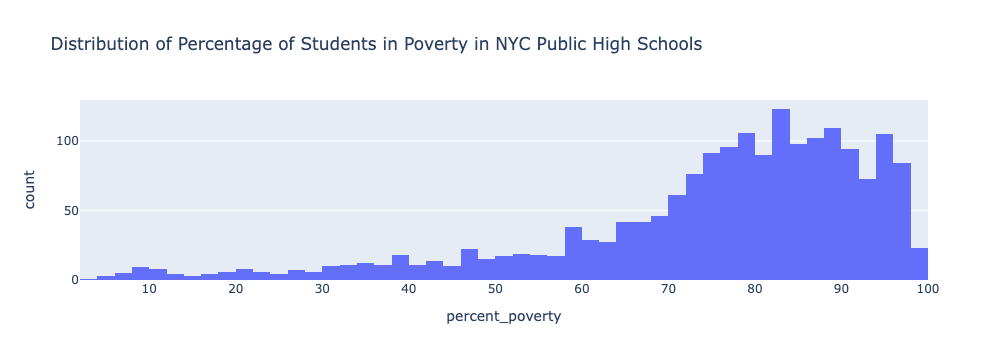

In [23]:
# Plot the data showing the % of students whose families are below the poverty line in schools
import plotly.express as px

# Create a histogram for percent_poverty
fig = px.histogram(dataframe, x="percent_poverty", title="Distribution of Percentage of Students in Poverty in NYC Public High Schools")
fig.show()


#### Answer the following question:
---

**1.** What can you say about the schools overall, if anything?

Most NYC public high schools have high poverty rates, between 70% and 100%.This suggests poverty is a widespread issue across the public school system.



#### Task 2E: Create a scatter plot to see whether a relationship might exist between the percentage of low-income students in a school and the percentage of English learners in a school.

The percentage of students who fall below the poverty line should be on the horizontal axis, and the percentage of English learners should be on the vertical axis.

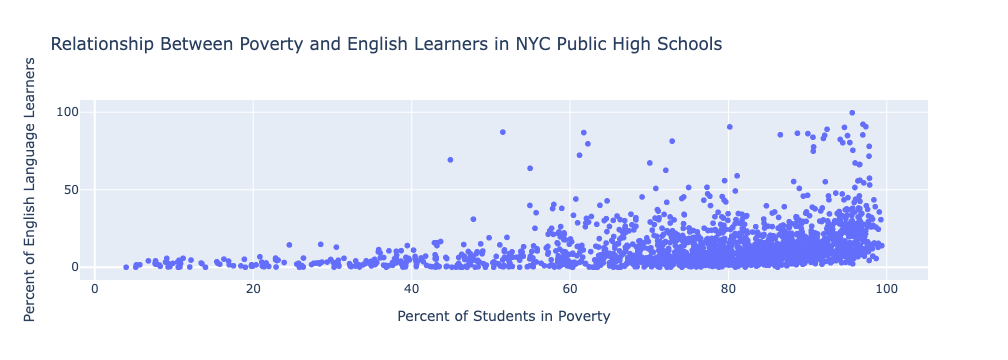

In [24]:
# Create a scatter plot of percent_english_learners vs percent_poverty
import plotly.express as px

# Create scatter plot
fig = px.scatter(dataframe, x="percent_poverty", y="percent_english_learners", title="Relationship Between Poverty and English Learners in NYC Public High Schools", labels={"percent_poverty": "Percent of Students in Poverty","percent_english_learners": "Percent of English Language Learners"})
fig.show()


If there is a relationship, what policy recomendations can you make?

Schools with higher poverty levels showcase the need for more English learners, suggesting a need for language support in these schools.

# LevelUp

![](https://media.giphy.com/media/YL08285SCvrWbiEWX7/giphy.gif)

Congratulations on completing the Milestone! In the last visualization, you created scatter plots to visually inspect whether a relationship might exist between variables.

There is a way to **quantify** the relationship between *any* two variables! It is called **correlation**. Correlation ranges from -1 to 1.

When the correlation between two variables is equal to 1, this means that there is a perfect relationship between them. Two variables that would be (almost!) perfectly correlated are `age` and `birth_year`. If you know someone's year of birth, you can predict their age. If you know their age, you can predict their birth year.

When the correlation between two variables is equal to 0, this means that there is no relationship between two variables. For example, `shoe_size` and `favorite_color`. These two variables are not related in any meaningful way.

A negative correlation means that an increase in one variable leads to a decrease in the other. For example, `sea_level` and `temperature`. As you climb a mountain, increasing your hight above sea level, it gets colder. The temperature decreases.

Pandas offers a quick way to examine the correlation between variables at a single glance: the `.corr()` method applied to a DataFrame. The `.corr()` method will produce a table of correlation coefficients: each row/column intersection is the correlation between the variable named in the row and the variable named in the column.

---

## Task 3: Correlated Variables

#### Apply the .corr() method to your DataFrame containing the NYC Department of Education data.

Examine the table and determine **which two variables have the strongest correlation, and how strong that correlation is.**

Here's a rough guide to understanding correlation coefficients:
- Correlation between 0 and 0.2 is considered to be non-existent to weak.
- Correlation between 0.2 and 0.4 is considered weak.
- Correlation between 0.4 and 0.6 is considered moderate.
- Correlation between 0.6 and 0.8 is considered to be strong.
- Correlation between 0.8 and 1 is considered to be very strong.

<span style='background :#FFF59E'>**Note:** a variable will always be perfectly correlated with itself! So disregard the diagonal of your output when answering this question!</span>

In [26]:
# Apply the .corr() method to the dataframe
numeric_df = df.drop(columns=["school_name"])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                                    total_enrollment  \
total_enrollment                            1.000000   
percent_students_with_disabilities         -0.176817   
percent_english_learners                    0.027771   
percent_poverty                            -0.143091   

                                    percent_students_with_disabilities  \
total_enrollment                                             -0.176817   
percent_students_with_disabilities                            1.000000   
percent_english_learners                                      0.020820   
percent_poverty                                               0.079578   

                                    percent_english_learners  percent_poverty  
total_enrollment                                    0.027771        -0.143091  
percent_students_with_disabilities                  0.020820         0.079578  
percent_english_learners                            1.000000         0.315477  
percent_poverty             

The highest coorelation between two variables is percent english learners and percent poverty. As the percentage of students in poverty increases, the percentage of English language learners also tends to increase.
